## **Trabajo Práctico Individual n° 2: Aprendizaje Supervisado**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

 - Nombre: Paula
 - Apellido: Rodriguez Cabrera
 - Legajo: 156.388-9

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el aprendizaje automático supervisado.

Utilizaremos un dataset de airbnb donde buscaremos predecir el precio de las noches de cada hogar en funcion de algunas variables.

#### Variables:
- Unnamed: 0: Variable de contador de registros (no será utilizada en nuetro análisis)
- neighbourhood: Barrio donde se encuentra ubicado la casa.
- room_type: Tipo de hogar en alquiler.
- price: Precio por noche.
- minimum_nights: Cantidad minimas de noches que pueden alquilar el hogar.
- number_of_reviews: Cantidad de reviews
- reviews_per_month: Tasa de reviews que tienen por mes
- calculated_host_listings_count: Cantidad de hogares ofrecidos por el host.
- availability_365: Cantidad de dias que se encuentra en alquiler el hogar

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 13 de Octubre 2022 a las 23h59

In [1]:
## Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
## Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import svm, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV


##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset bajo en nombre "london"
- corroborar que lo hayamos cargado correctamente.

In [3]:
# Se importo el dataset con Pandas y luego se muestran parte del dataset
london = pd.read_csv('TP2_airbnb_london.csv')
london.head()

,Unnamed: 0,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Haringey,Private room,35,1,131,1.71,4,262
1,1,Ealing,Private room,70,2,2,0.07,6,62
2,2,Islington,Private room,45,1,14,0.14,2,364
3,5,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,6,Barnet,Private room,29,5,114,1.13,3,285


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset y eliminar la variable "Unnamed:0" del dataset.
Volver a guardar el dataset sin esta variable bajo el nombre "london" 

In [4]:
# Se utiliza shape para muestrar las dimensiones del dataset
london.shape

(51827, 9)

In [5]:
# Se guarda en una nueva variable el dataset sin la columna Unnamed:0
mod= london.iloc[:,1:]
# Se sobreescribe london con el nuevo dataset modificado 
london=mod
# Primera verificacion 
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Haringey,Private room,35,1,131,1.71,4,262
1,Ealing,Private room,70,2,2,0.07,6,62
2,Islington,Private room,45,1,14,0.14,2,364
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295
4,Barnet,Private room,29,5,114,1.13,3,285


In [6]:
# Segunda verificacion
london.shape

(51827, 8)

##### **Objetivo 3**
Corroborar que el dataset no cuenta con valores nulos, si los hubiera llenarlos todos con 0.

In [7]:
# Se corrobora que no halla nulos
london.isnull().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

##### **Objetivo 4**
Mostrar el tipo de dato para las variables "neighbourhood" y "room_type".

In [8]:
# Se muestra el tipo de variable que neighbourhood
london.neighbourhood.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51827 entries, 0 to 51826
Series name: neighbourhood
Non-Null Count  Dtype 
--------------  ----- 
51827 non-null  object
dtypes: object(1)
memory usage: 405.0+ KB


In [9]:
# Se muestra el tipo de variable que room_type
london.room_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 51827 entries, 0 to 51826
Series name: room_type
Non-Null Count  Dtype 
--------------  ----- 
51827 non-null  object
dtypes: object(1)
memory usage: 405.0+ KB


##### **Objetivo 5**
Generar las variables dummies para estas dos variables categóricas y unirlas al dataset london.


In [10]:
# Se genera las dummies para la variable neighbourhood, dentro de la variable ndummies.
ndummies = pd.get_dummies(london.neighbourhood)

Imprimir las dimensiones y primeras lineas de estas dummies

In [11]:
ndummies.head(2)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ndummies.shape

(51827, 33)

In [13]:
# Se genera las dummies para la variable room_type, dentro de la variable rdummies.
rdummies = pd.get_dummies(london.room_type)

Imprimir las dimensiones y primeras lineas de estas dummies

In [14]:
rdummies.head(2)

,Entire home/apt,Private room,Shared room
0,0,1,0
1,0,1,0


In [15]:
rdummies.shape

(51827, 3)

Joinear las variables dummies al dataset



In [16]:
# Se crea una variable que contiene a las dos dummies generadas y luego se une al dataset original
others=pd.concat([ndummies,rdummies], axis=1)
london=london.join(others)

In [17]:
london.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,Haringey,Private room,35,1,131,1.71,4,262,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Ealing,Private room,70,2,2,0.07,6,62,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Islington,Private room,45,1,14,0.14,2,364,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Tower Hamlets,Entire home/apt,102,5,7,0.07,56,295,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Barnet,Private room,29,5,114,1.13,3,285,0,1,...,0,0,0,0,0,0,0,0,1,0


##### Dividiremos nuestro dataset en la variable dependiente "y" (label o etiqueta) y las variables independientes "x"

In [18]:
# Se le asigna a y las etiquetas
y = np.array(london[['price']])
# Se le asigana a x el dataset london sin las columnas price, neighbourhood y rooom_type
x = london.drop(['price','neighbourhood','room_type'], axis=1)
x.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Private room,Shared room
0,1,131,1.71,4,262,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2,0.07,6,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,14,0.14,2,364,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5,7,0.07,56,295,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,114,1.13,3,285,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### **Objetivo 7**

Dividir el dataset entre Train y Test, tomar un test_size del 30%.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
# Se observa la dimensiones de y_train
y_train.shape

(36278, 1)

In [21]:
# Se observa la dimensiones de x_train
x_train.shape

(36278, 41)

In [22]:
# Se observa la dimensiones de x_test
x_test.shape

(15549, 41)

##### **Objetivo 8**
Con el StandardScaler generado en la linea siguiente, realizar el transform para el xtrain y xtest guardandolos en nuevas variables llamadas "xtrain_scal" y "xtest_scal".


In [23]:
dummies = np.array(london[['price']])
# Se le asigana a x el dataset london sin las columnas price, neighbourhood y rooom_type
x = london.drop(['price','neighbourhood','room_type'], axis=1)

In [24]:
_xtrain=x_train.iloc[:, lambda x_train: [0,1,2,3,4]]
_xtraindummies=x_train.iloc[:, 5:]

scaler = preprocessing.StandardScaler().fit(_xtrain)

Text(0.5, 1.0, 'Estandarizada')

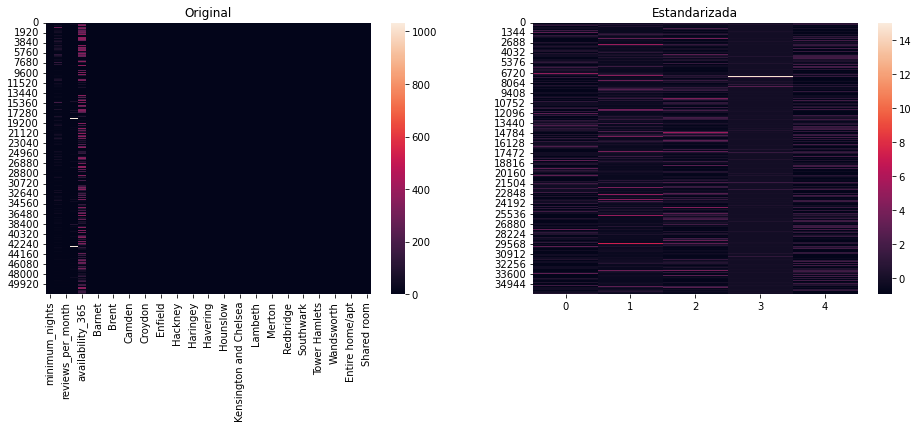

In [25]:
xtrain_scal = scaler.transform(_xtrain) 

np.concatenate((xtrain_scal,_xtrain),axis = 1)

# Se verifica
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
axs[0].set_title('Original')
axs[1].set_title('Estandarizada')

Text(0.5, 1.0, 'Estandarizada')

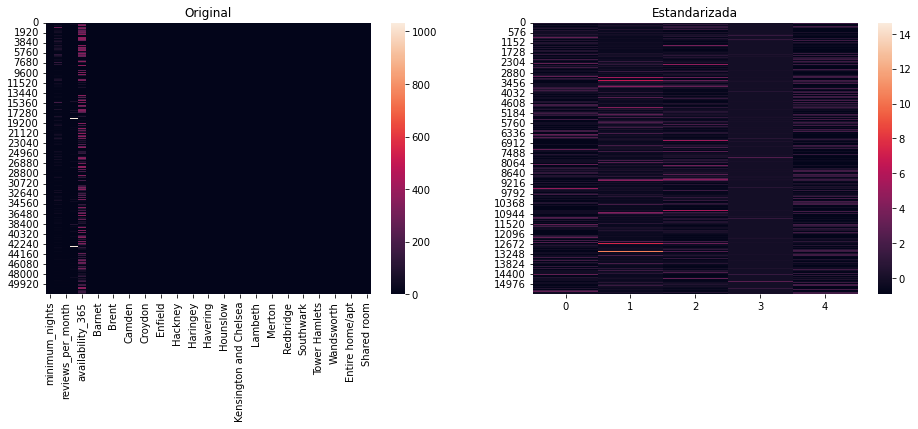

In [26]:
_xtest=x_test.iloc[:, lambda x_test: [0,1,2,3,4]]
_xtestdummies=x_test.iloc[:, 5:]

xtest_scal = scaler.transform(_xtest)  

np.concatenate((xtest_scal,_xtest),axis = 1)

# Se verifica
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtest_scal, ax = axs[1])
axs[0].set_title('Original')
axs[1].set_title('Estandarizada')

##### **Objetivo 9**
Crear un modelo lineal y entrenarlo para nuestro dataset.

Obtener las predicciones y el "mean_squared_error" para el test set.

In [27]:
# Se crea la Regresión Linear y se entrena
lineal = linear_model.LinearRegression().fit(xtrain_scal, y_train)
 
# Se hace las predicciones
y_predit = lineal.predict(xtest_scal)
 
# Error Cuadrado Medio
np.sqrt(mean_squared_error(y_test, y_predit))


53.99096835976559

##### **Objetivo 10**
Crear un SVM Regressor y un GridSearch para realizar la búsqueda de hiperparámetros.

Asignar dos posibles valores para el parámetro "kernel", y tres posibles valores para "C" y "gamma".

Setear al parámetro "refit" en True y hacer 5 CrossValidation.

In [28]:
#Creamos el modelo
svmRegressor = SVR()

para = {'kernel':('linear','rbf'),
        'C':[1,20,50],
        'gamma':[0.001,0.01,0.1]}

grid = GridSearchCV(svmRegressor,param_grid = para,refit = True,cv = 5,verbose=2)

# Se entrena el modelo
grid.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=  25.5s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=  25.8s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=  25.4s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=  25.3s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=  25.4s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  41.8s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  42.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  42.3s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  41.6s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  42.8s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  25.8s
[CV] END .....................C=1, gamma=0.01, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 20, 50], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [29]:
# Se hacen las predicciones
y_pred = grid.predict(xtest_scal)

In [30]:
# Se observan los mejores valores de C y gamma
grid.best_score_

0.10717724775184942

##### **Objetivo 11**

Mostrar cuales fueron los mejores hiperparámetros y para estos obtener el mean_squared_error en el test set.

In [31]:
# Se observan los mejores hiperparametros
grid.best_params_

{'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
# Se observan el mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

52.72787179968958

##### **Objetivo 12**
Repetir el objetivo 10 pero ahora seteando nuevos valores para los hiperparámetros mencionados con el objetivo de mejorar las predicciones.

Cuales son los mejores hiperparámetros ahora?
Obtenemos una mejora en las predicciones?
Mostrar los resultados.

La mejor modelizacion la hico el primer SVM Regressor, luego la regresion lineal y por ultimo SVM Regressor con el cambio de los hiperparametros

In [33]:
#Creamos el modelo
svmRegressor2 = SVR()

para2 = {'kernel':('linear','rbf'),
        'C':[0.001,0.01,0.1],
        'gamma':[1,20,50]}

grid2 = GridSearchCV(svmRegressor2,param_grid = para2,refit = True,cv = 5,verbose=2)

# Se entrena el modelo
grid2.fit(xtrain_scal, y_train.ravel())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=  25.2s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=  26.2s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=  25.3s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=  26.0s
[CV] END ....................C=0.001, gamma=1, kernel=linear; total time=  25.6s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=  42.6s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=  41.5s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=  43.7s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=  41.9s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=  42.0s
[CV] END ...................C=0.001, gamma=20, kernel=linear; total time=  25.4s
[CV] END ...................C=0.001, gamma=20, k

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1], 'gamma': [1, 20, 50],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [34]:
grid2.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [35]:
y_pred2 = grid2.predict(xtest_scal)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred2))

55.31449584861764

In [37]:
print ("Etiquetas"+"\t"+"1° Modelo"+"\t\t"+"2° Modelo"+"\t\t\t"+"3° Modelo")
a=0
for i in y_test:
    print (i,"\t\t",y_predit[a],"\t\t",y_pred[a],"\t\t",y_pred2[a]) 

    a=a+1  


Etiquetas	1° Modelo		2° Modelo			3° Modelo
[165] 		 [121.56209662] 		 83.6614601713059 		 105.15713354933217
[220] 		 [87.2631156] 		 80.76985233950134 		 70.96895923751694
[62] 		 [84.82047313] 		 86.2241624017118 		 70.49656806477505
[79] 		 [75.15035588] 		 72.77382326050166 		 64.88061214241183
[25] 		 [77.51845667] 		 62.24431278307149 		 64.65709555296712
[100] 		 [91.9013546] 		 90.91950398500961 		 82.11547988277779
[60] 		 [77.20857696] 		 46.882396773797225 		 67.18525228738761
[70] 		 [93.69751422] 		 82.6196159408316 		 84.50498071535891
[64] 		 [89.92467395] 		 108.3397668532972 		 79.83869512885127
[119] 		 [88.36655966] 		 96.92959382415914 		 78.5858529547719
[99] 		 [86.49642853] 		 90.60249070829836 		 77.15766084965152
[40] 		 [83.90240025] 		 86.09600436380258 		 70.45130219171709
[150] 		 [77.19622864] 		 46.90342208384456 		 67.23046076367906
[40] 		 [72.50212561] 		 48.48662142838781 		 60.63851855046197
[18] 		 [98.93039605] 		 83.99110762252054 		 81.0933272872

[55] 		 [103.49299256] 		 92.51999485498476 		 91.32498751550179
[159] 		 [82.64518196] 		 70.53589812469826 		 72.90860515193779
[60] 		 [72.58760626] 		 58.81457314491396 		 62.67274627761271
[30] 		 [114.08572637] 		 88.46585909545485 		 102.16029989762156
[85] 		 [99.73484688] 		 77.43978400225588 		 90.65419401685111
[69] 		 [72.31084043] 		 65.40896683034211 		 60.04367639185182
[40] 		 [78.58814534] 		 51.06802865935339 		 66.68467829306778
[120] 		 [108.80640666] 		 124.18989176436074 		 97.16190965239227
[100] 		 [90.33811022] 		 87.54953704374314 		 78.94658459272307
[40] 		 [104.53720384] 		 32.57755482447324 		 86.19859399859743
[43] 		 [93.00509912] 		 123.9880981877896 		 77.69715957259866
[38] 		 [67.01540824] 		 40.2673423140255 		 57.574085460279264
[80] 		 [82.83269392] 		 74.84081210832173 		 72.43529395397408
[80] 		 [72.04410155] 		 55.10989903251261 		 61.04322383487188
[25] 		 [92.1614401] 		 80.52934259364073 		 79.9426031279172
[100] 		 [85.39487976] 		 91.3059

[23] 		 [120.59039004] 		 85.80047586999837 		 104.59507415725825
[25] 		 [113.88969726] 		 97.79099013769596 		 102.15251657829516
[149] 		 [84.72189008] 		 54.00701529911285 		 67.35280923808503
[250] 		 [86.36435798] 		 66.71069260022628 		 70.26062467657945
[230] 		 [88.41417821] 		 78.29215089864815 		 78.87679084097131
[85] 		 [82.9190288] 		 82.56096849628625 		 71.76789834003756
[85] 		 [96.50694497] 		 81.11375072398485 		 87.49638084950794
[130] 		 [90.47671424] 		 101.92195892219424 		 80.93940102137601
[50] 		 [80.88101414] 		 52.31801200119327 		 65.39628552167548
[99] 		 [89.11843706] 		 77.70247463135307 		 79.07604711847786
[65] 		 [83.04185939] 		 67.06411454302642 		 73.24622794779386
[49] 		 [84.55811696] 		 76.28348317996729 		 72.89980139656882
[171] 		 [214.65974193] 		 201.48537072597287 		 195.42838738254957
[59] 		 [77.75090884] 		 49.43811612728146 		 67.70080850280443
[40] 		 [100.02215093] 		 77.38852209520041 		 90.90340334934935
[99] 		 [75.54663452] 		 55

[135] 		 [92.92286142] 		 69.96219101845786 		 75.78323781660228
[39] 		 [83.02904842] 		 67.18389253559836 		 73.23346690538895
[250] 		 [76.70133455] 		 54.68998697377847 		 66.7703420629939
[54] 		 [83.91939116] 		 56.98499459460947 		 68.00673107528121
[220] 		 [103.43959911] 		 90.06893944110018 		 91.5485821566569
[21] 		 [91.6275997] 		 88.47296972019521 		 82.40615824535236
[85] 		 [94.87293321] 		 101.39787495809577 		 79.1724269015473
[30] 		 [80.57396859] 		 83.18629234835858 		 71.36304195060872
[20] 		 [88.07296492] 		 49.704378233134065 		 70.10314377763923
[50] 		 [88.62305454] 		 88.48680350033945 		 78.35774605738473
[100] 		 [82.52572991] 		 75.59711922232185 		 72.48471299445391
[81] 		 [77.33691799] 		 46.09259511961984 		 67.34184747078498
[50] 		 [77.18341767] 		 46.98034703522269 		 67.21769972127419
[38] 		 [76.19651029] 		 51.67430874525929 		 66.177129937399
[99] 		 [116.95691122] 		 104.86224877858021 		 100.43817784215442
[45] 		 [74.35189807] 		 54.89188950

[90] 		 [99.77327979] 		 77.32351395757092 		 90.6924771440658
[50] 		 [82.08265588] 		 74.91022666336465 		 72.49204308286241
[45] 		 [77.18318634] 		 47.01306779225847 		 67.18871496192595
[35] 		 [80.60213861] 		 56.16730201356777 		 67.22458761283062
[55] 		 [82.91740532] 		 74.63590802559318 		 72.57325573299181
[65] 		 [85.27968199] 		 90.90986323984953 		 75.85837225871275
[45] 		 [88.50385501] 		 77.48924260319531 		 78.96611813780572
[180] 		 [98.69270854] 		 100.92977037995179 		 81.43527252161797
[100] 		 [90.57005306] 		 98.75292844388011 		 81.40691440731692
[30] 		 [77.43642783] 		 52.1389284012169 		 66.15472456878183
[20] 		 [110.47902187] 		 74.57916576859357 		 101.85735028450952
[89] 		 [97.437988] 		 90.89807023746292 		 80.91057909605182
[275] 		 [87.83948052] 		 96.34425112237884 		 72.8658004086975
[33] 		 [78.36322249] 		 86.06369549699336 		 69.85101583891475
[25] 		 [117.73033355] 		 95.71384185416649 		 103.93154964361716
[26] 		 [98.68899095] 		 79.407463478

[150] 		 [81.48690146] 		 84.49625086002425 		 69.84246932434615
[120] 		 [82.184681] 		 74.15163426361715 		 72.53616190340536
[140] 		 [87.1038052] 		 92.96905639702015 		 77.62180579802788
[140] 		 [83.56612193] 		 73.87012678306725 		 70.14493270493794
[65] 		 [84.12787446] 		 53.07353280269108 		 67.23279830451428
[60] 		 [82.63553627] 		 71.81662182349334 		 72.7062016614048
[70] 		 [92.40873721] 		 113.51852643663211 		 82.5003146643576
[30] 		 [76.50443623] 		 50.5450254552168 		 66.54136447381345
[200] 		 [105.32064479] 		 121.80434640404604 		 94.08995916433476
[88] 		 [75.95098558] 		 74.97382078539319 		 66.39275463821582
[230] 		 [99.75639208] 		 79.23793711688529 		 90.54657508173551
[38] 		 [70.59147773] 		 55.822885878968954 		 60.77495278744329
[18] 		 [87.26047816] 		 53.43485913156313 		 69.80256841914996
[95] 		 [84.16907458] 		 78.9401617683112 		 72.76056515969046
[26] 		 [103.35727332] 		 75.98799856422649 		 94.30999994705903
[99] 		 [88.63071767] 		 77.69000489

[60] 		 [81.24429058] 		 53.17661770716894 		 67.93379430275024
[49] 		 [71.01594443] 		 51.39636235300785 		 61.708351965279505
[40] 		 [79.18712629] 		 62.4256765887414 		 65.80356986499802
[200] 		 [91.04641575] 		 102.76288050605977 		 78.51678389023276
[45] 		 [86.32239455] 		 68.10124097279116 		 68.65276152967137
[50] 		 [83.60640555] 		 86.59086849292066 		 70.99300760063899
[150] 		 [90.12811863] 		 85.57962604698172 		 73.79958715043833
[33] 		 [104.91526056] 		 85.0261043110639 		 87.58207426732264
[200] 		 [122.37024969] 		 89.97995803533732 		 105.57496053411879
[55] 		 [88.58336114] 		 48.8595361703383 		 70.28576333417688
[60] 		 [82.78610263] 		 69.31503535883053 		 73.04897661839192
[36] 		 [80.27449037] 		 48.96430202647453 		 67.61353894763857
[120] 		 [81.6864411] 		 77.61590175358296 		 72.21238980570276
[60] 		 [82.23648957] 		 59.853536477359825 		 66.21573529328437
[41] 		 [93.45410578] 		 83.84094809536685 		 84.26252090966548
[80] 		 [79.73215395] 		 79.855593

[190] 		 [75.20234374] 		 56.14027322344933 		 65.81943333547586
[38] 		 [75.94759723] 		 54.01053065652461 		 65.74943333927827
[120] 		 [78.93127515] 		 73.17152760425218 		 68.3302814214844
[27] 		 [75.98057439] 		 53.07431118238587 		 66.19207029130104
[56] 		 [77.69214795] 		 54.061812062335505 		 66.05426135868235
[20] 		 [74.20193142] 		 57.6622331544754 		 64.67914823115129
[90] 		 [84.82909467] 		 96.00233634002876 		 76.01503179956298
[98] 		 [64.68465041] 		 53.42604190545438 		 56.45019499332891
[35] 		 [71.68563791] 		 46.69338906586593 		 61.381346670373
[69] 		 [80.6420546] 		 81.56842948245593 		 70.55087024223452
[48] 		 [79.46895161] 		 82.40295584609734 		 70.01585550447194
[45] 		 [76.12056977] 		 52.272904260886655 		 66.21650272036231
[50] 		 [82.71744135] 		 73.65573708119881 		 68.85371414472596
[40] 		 [116.90198226] 		 84.70141689441272 		 101.98306557286605
[60] 		 [82.12879148] 		 77.06855269779564 		 72.19321112414647
[60] 		 [77.17014405] 		 47.10139528461

[57] 		 [86.1453943] 		 93.96224810620278 		 75.58585738182276
[100] 		 [82.53917724] 		 59.84786474476074 		 67.22015284451578
[110] 		 [84.49573517] 		 78.07582829978983 		 72.71023228573384
[40] 		 [59.22962592] 		 46.092549114971625 		 51.14732438211369
[26] 		 [76.85056376] 		 48.857907300891895 		 66.9148973780945
[40] 		 [81.07254408] 		 81.2349872757093 		 71.47801170225257
[57] 		 [88.06897619] 		 68.43649148004995 		 74.55591552175363
[125] 		 [105.78426157] 		 77.97402367312017 		 96.8852639142647
[40] 		 [86.9663184] 		 91.66190654924227 		 76.13825819260147
[40] 		 [86.79194596] 		 83.38375459157064 		 70.05147710604486
[110] 		 [83.7129238] 		 54.73731777937266 		 68.70373663093932
[190] 		 [101.562448] 		 100.15223909001296 		 86.6140386546687
[65] 		 [88.52924562] 		 77.14379484782694 		 78.96265546326737
[80] 		 [69.77415748] 		 44.35503217010325 		 56.871066514669614
[45] 		 [96.33768958] 		 125.26788891905564 		 83.24115964524475
[20] 		 [103.35216653] 		 83.04402838

[52] 		 [75.66581127] 		 55.661781908743976 		 64.6413126837276
[25] 		 [88.04358537] 		 81.89855823081209 		 78.62265964862146
[80] 		 [101.89116753] 		 91.9515604900244 		 90.38329109701345
[134] 		 [82.84969484] 		 68.80861811101917 		 73.0548123117201
[18] 		 [81.91317753] 		 54.69501505103932 		 68.14291211032085
[70] 		 [82.14671073] 		 74.44136265402514 		 72.55584829488701
[69] 		 [75.68615991] 		 55.680784545656884 		 64.51058273545821
[90] 		 [110.8766246] 		 77.06951737652085 		 102.31091211775852
[50] 		 [87.20589835] 		 55.72798446124521 		 69.00386006900347
[203] 		 [106.61049438] 		 97.90975621459174 		 92.3069194001366
[75] 		 [87.49680422] 		 87.01914249917223 		 78.00023141447474
[60] 		 [91.13435528] 		 78.40113175168256 		 73.83208307591065
[65] 		 [76.69729477] 		 49.66517100213093 		 66.81973438793183
[33] 		 [85.51621019] 		 61.70988947912783 		 68.0221810836029
[90] 		 [82.54412457] 		 81.38402287458645 		 69.81199301301659
[74] 		 [84.73856287] 		 88.6069248384

[105] 		 [91.2552317] 		 97.64247832021329 		 78.7908797813147
[55] 		 [70.22037644] 		 57.38588747642101 		 58.29790674867199
[44] 		 [87.36406453] 		 89.57023050854274 		 72.81186798940163
[89] 		 [86.97454558] 		 85.41655902469951 		 71.86902178503028
[41] 		 [74.13592542] 		 54.20645685073403 		 61.56566434956419
[60] 		 [83.41921846] 		 58.322223142709845 		 66.14424842296741
[96] 		 [68.09390601] 		 52.06886189721614 		 59.57799679346782
[189] 		 [79.43153571] 		 80.11108170545701 		 69.67902942614724
[55] 		 [79.4927823] 		 79.68512718611707 		 69.65928814470249
[35] 		 [83.62736973] 		 58.723847273383214 		 73.1329766553493
[129] 		 [80.71963719] 		 82.56144450614758 		 71.21894974487068
[150] 		 [103.75906588] 		 102.20523459710849 		 91.42221883795759
[140] 		 [80.45751323] 		 82.65659375029581 		 71.10326877222339
[100] 		 [99.63874712] 		 80.9394402145376 		 90.63651111459474
[125] 		 [75.08264921] 		 62.522953174389755 		 65.38423591549216
[73] 		 [78.83880077] 		 55.07646

[100] 		 [78.58942479] 		 81.17104596546878 		 69.5300041745874
[24] 		 [88.44003148] 		 78.17887207675187 		 78.93129768512934
[100] 		 [82.65799293] 		 70.42769685875439 		 72.92136619434272
[18] 		 [75.8807526] 		 65.38394920046701 		 64.66935603107491
[30] 		 [82.21925485] 		 45.286797675332735 		 68.6138517483741
[290] 		 [98.36015936] 		 99.69133658174138 		 83.02973416243135
[30] 		 [82.83711519] 		 68.89571194336959 		 73.07103602866339
[100] 		 [83.16596856] 		 77.80655720585378 		 72.57929542301295
[40] 		 [77.43917443] 		 45.50817743079048 		 67.41495105067611
[60] 		 [82.031412] 		 75.27299162565191 		 72.44099891324272
[65] 		 [118.21412439] 		 90.40082764816208 		 104.21227476616436
[115] 		 [74.19067699] 		 57.01499463552777 		 64.4865343176088
[90] 		 [82.12695671] 		 76.31403625411617 		 72.09307179512463
[49] 		 [77.76901353] 		 56.074256406608725 		 67.19849368720726
[150] 		 [85.46013446] 		 104.91018791581763 		 75.21569052337661
[150] 		 [88.65735533] 		 75.953588

[100] 		 [92.88851889] 		 91.3234644872934 		 79.73453273098171
[133] 		 [83.55425942] 		 66.30271768583714 		 68.21978679091626
[30] 		 [76.56802844] 		 50.146979496499284 		 66.54720016714168
[120] 		 [76.68151548] 		 69.64986606604012 		 67.74454789364738
[30] 		 [93.57227615] 		 65.81295530476271 		 75.6494339925996
[120] 		 [92.29467444] 		 84.51330168477999 		 75.1234951786806
[90] 		 [94.95594977] 		 94.98177439113049 		 78.28866430433845
[25] 		 [77.43917443] 		 45.50817743079048 		 67.41495105067611
[120] 		 [81.14814901] 		 80.20024207856892 		 71.64744126534798
[90] 		 [81.50685618] 		 78.60827510083908 		 72.0047504526857
[100] 		 [82.38886407] 		 84.4467398044961 		 69.42502451397381
[121] 		 [80.61993629] 		 51.219654994702935 		 63.96948721818169
[100] 		 [88.59330048] 		 76.5550779631829 		 79.02646067529191
[35] 		 [90.55769921] 		 65.99200268555502 		 75.67999701366696
[225] 		 [83.19823094] 		 73.32524160418447 		 72.76900230325352
[90] 		 [77.17037537] 		 47.0876102

[48] 		 [90.35896619] 		 71.07603780719788 		 72.93317841093116
[59] 		 [72.46472858] 		 59.80932037182056 		 63.581311169742854
[50] 		 [84.21051106] 		 80.85465096840922 		 72.38330261094492
[50] 		 [90.11694079] 		 80.77748601044502 		 73.7828749928102
[50] 		 [63.59369476] 		 43.08431729671406 		 58.180409952493534
[175] 		 [87.91524434] 		 82.7257632994174 		 78.46606446522405
[60] 		 [75.60628891] 		 56.44972338328802 		 65.34828266538366
[28] 		 [84.73419877] 		 46.57898269980654 		 67.3142323507426
[47] 		 [86.38431118] 		 73.7253288970464 		 73.8741111927707
[200] 		 [82.90117004] 		 68.31917273194861 		 73.13484124068796
[35] 		 [82.0959295] 		 74.77939161718683 		 72.56277364396374
[47] 		 [85.07982924] 		 69.1337639698189 		 73.5237343898558
[150] 		 [91.99023575] 		 88.58244408840795 		 82.46386079412255
[69] 		 [78.8725491] 		 78.79013609818989 		 68.17326421359712
[250] 		 [84.92174557] 		 89.07304430630349 		 71.70063765300446
[90] 		 [92.9804999] 		 115.33358038306712 

[220] 		 [88.86834214] 		 79.69026907813536 		 70.83175013574234
[130] 		 [89.83588401] 		 91.9311692217896 		 78.4587288003488
[80] 		 [76.86976273] 		 50.52656689774885 		 67.01206385748245
[64] 		 [91.96683663] 		 91.51020930349605 		 82.75912897754104
[50] 		 [82.78610263] 		 69.31503535883053 		 73.04897661839192
[30] 		 [92.61506233] 		 88.87454649832982 		 79.7490565972724
[37] 		 [77.64418887] 		 79.46850352099185 		 68.93350414880193
[75] 		 [86.43416195] 		 45.21689241126712 		 68.81642462117873
[25] 		 [87.0480501] 		 56.24112782116995 		 69.7918842032635
[115] 		 [85.21589664] 		 75.0838569809901 		 70.05000379327778
[170] 		 [88.97994779] 		 110.7294964258217 		 75.4878906102438
[95] 		 [86.4293493] 		 92.81407189720946 		 77.34342551984955
[130] 		 [87.38629004] 		 89.3738619508621 		 77.89863290013983
[154] 		 [103.24223648] 		 174.20603478641047 		 87.27168977713436
[120] 		 [88.6701663] 		 75.83177683582929 		 79.10302692972147
[135] 		 [91.68526655] 		 87.809977294919

[250] 		 [98.94066589] 		 104.02443937079059 		 85.642884976674
[45] 		 [82.97986368] 		 70.87624323770615 		 72.93872659974103
[225] 		 [83.11237244] 		 87.64800081946653 		 70.76480225916633
[19] 		 [79.75672286] 		 44.264179373088865 		 67.77422294100506
[25] 		 [120.30090835] 		 88.04049083039241 		 104.19688881203669
[247] 		 [80.41123446] 		 56.388097867290625 		 69.07564081628169
[55] 		 [67.79968468] 		 47.40787921264787 		 59.07898484532356
[32] 		 [80.37473617] 		 51.29604922202666 		 67.68262559597443
[35] 		 [84.60542078] 		 87.4661400474875 		 75.31126220038118
[50] 		 [88.64454436] 		 76.07489827846591 		 79.07750484491163
[36] 		 [88.07371734] 		 71.03225958451901 		 73.99879663518382
[69] 		 [79.3850929] 		 85.7806672099581 		 70.49509735978158
[21] 		 [70.83574996] 		 47.69544407706056 		 59.414581250741136
[70] 		 [111.51749978] 		 78.04996023576145 		 102.02875849112283
[100] 		 [82.83303846] 		 70.36891160704016 		 72.93789500873801
[65] 		 [86.31618628] 		 91.73918

[130] 		 [104.76868051] 		 86.22089719606069 		 87.4033830050073
[46] 		 [70.27085794] 		 53.08299229725152 		 61.92331104264513
[120] 		 [94.17513616] 		 118.6354292932636 		 81.14540798334257
[26] 		 [75.85902255] 		 58.24370988334557 		 64.08450849803808
[90] 		 [94.85229274] 		 78.14511613542233 		 85.08307909692365
[110] 		 [85.32845025] 		 98.3044330167909 		 72.62841261806044
[24] 		 [99.91396914] 		 76.2592175751925 		 90.80386385117173
[35] 		 [88.6701663] 		 75.83177683582929 		 79.10302692972147
[45] 		 [83.05347877] 		 71.4718523397332 		 73.27011502501885
[90] 		 [86.28738929] 		 78.49730722507744 		 73.98640647149168
[23] 		 [82.52890236] 		 50.84671911407592 		 68.60460931839461
[80] 		 [79.91493344] 		 72.49814824964398 		 68.7523816820566
[66] 		 [79.21925811] 		 84.93040205177803 		 70.20931365590158
[95] 		 [95.10037764] 		 101.0889815567773 		 79.88364419069799
[38] 		 [121.81514181] 		 81.36421633505901 		 104.89059344473564
[35] 		 [95.61500245] 		 96.782621597653

[85] 		 [93.8244673] 		 80.0705621799055 		 84.48766734266705
[105] 		 [119.28769153] 		 104.78461618628697 		 105.55199503789592
[170] 		 [81.53739764] 		 84.37812757968685 		 71.08770130962621
[40] 		 [77.41355249] 		 45.6658712646744 		 67.38942896586622
[80] 		 [79.33372951] 		 48.260012112121686 		 67.32412378229459
[135] 		 [88.54966199] 		 56.809764926831406 		 70.28504216006885
[34] 		 [88.01855845] 		 49.86332292955271 		 69.87706821112096
[0] 		 [68.69618637] 		 46.15589864324432 		 59.72475170012397
[160] 		 [87.49439258] 		 100.33468811546227 		 77.39368458907052
[19] 		 [118.15097184] 		 79.49880950572597 		 107.82313107369977
[140] 		 [67.73366974] 		 52.9272174021837 		 60.05451769004158
[55] 		 [77.10678317] 		 47.39592237722745 		 67.17011822619288
[65] 		 [94.35814239] 		 84.65471406225569 		 86.12179279172004
[125] 		 [73.03487159] 		 60.625646664249494 		 63.84111907024597
[25] 		 [79.32182596] 		 61.45124504819453 		 66.00449497563713
[150] 		 [89.29097222] 		 100.

[40] 		 [92.53613794] 		 103.09606418041864 		 80.85365517371073
[134] 		 [91.59092672] 		 96.81594640939308 		 76.77762585106385
[55] 		 [111.90228261] 		 80.04162594404015 		 101.75815588114398
[35] 		 [81.17939331] 		 82.7676840025712 		 70.57626492169865
[140] 		 [85.26866355] 		 91.28186811703824 		 69.55554486970213
[30] 		 [76.62346717] 		 51.001011695759246 		 66.28675382061921
[90] 		 [83.77516448] 		 73.00436486564566 		 72.89665976000917
[55] 		 [75.41639408] 		 57.84886047683395 		 65.72866473834932
[70] 		 [87.72976855] 		 88.23652505032024 		 73.29053541984902
[70] 		 [82.99061551] 		 67.54028635748841 		 73.19518377817417
[34] 		 [85.57828446] 		 65.44647896493252 		 68.84416736399432
[75] 		 [88.2355186] 		 80.19854394525227 		 78.78509052534703
[100] 		 [91.94321864] 		 93.23496438845302 		 79.25400702701596
[100] 		 [84.09256245] 		 100.55022793953086 		 74.25571679838406
[189] 		 [102.68892398] 		 152.04897417912235 		 85.62642753162713
[100] 		 [89.29913448] 		 111.

[27] 		 [86.80564347] 		 49.0083443075973 		 68.88878031141991
[50] 		 [89.88366167] 		 90.23393412150077 		 78.86734912723232
[70] 		 [88.09735611] 		 63.94287164555138 		 70.51083253886246
[40] 		 [88.6701663] 		 75.83177683582929 		 79.10302692972147
[50] 		 [77.31651153] 		 52.29689210833336 		 66.17158340099614
[85] 		 [82.41435316] 		 72.3625465784018 		 72.64992162930106
[39] 		 [84.13422583] 		 54.76638621248215 		 67.01948920199577
[128] 		 [86.94461781] 		 90.72125157226007 		 77.8730271139769
[87] 		 [83.18033468] 		 51.18374480334717 		 68.84764265034553
[150] 		 [82.82976692] 		 71.1786276592315 		 73.02674138584865
[35] 		 [86.33159383] 		 89.90219516375221 		 72.76185331032484
[41] 		 [76.76158094] 		 49.27927547971868 		 66.91252435930464
[90] 		 [77.42636346] 		 45.587177536894416 		 67.40219000827119
[30] 		 [77.79507067] 		 50.220663507771675 		 66.62800807793931
[44] 		 [66.74832148] 		 52.92715534501222 		 55.038333091331886
[25] 		 [77.56016719] 		 46.728611425437

[100] 		 [100.39565978] 		 110.70138447484703 		 89.83736945428743
[146] 		 [87.40692646] 		 104.30552253797757 		 76.41813477462505
[33] 		 [76.71495793] 		 50.88849190901958 		 66.31024465273777
[40] 		 [75.95000146] 		 66.11539705654046 		 66.9458069528536
[150] 		 [99.28917118] 		 146.8625246749673 		 83.55238921191966
[39] 		 [85.12425591] 		 68.97701539665857 		 69.9271390329589
[144] 		 [91.31291291] 		 90.72627715709973 		 82.09896846778847
[175] 		 [89.23861077] 		 76.82569883081813 		 79.17320469268513
[120] 		 [128.20426794] 		 158.23345295569362 		 115.79711068769973
[35] 		 [81.6863051] 		 81.11899222563027 		 71.23421454012495
[50] 		 [89.58579447] 		 100.66186078060866 		 76.12471842741719
[129] 		 [97.30995647] 		 86.5213655140947 		 80.46014991952225
[120] 		 [83.05331377] 		 94.68773095655361 		 72.21386851985775
[39] 		 [89.7567255] 		 67.66727441028091 		 72.40522072956927
[105] 		 [107.84834184] 		 73.1418654587232 		 95.64167005265074
[26] 		 [88.35358272] 		 53.6

[40] 		 [76.22971228] 		 59.496741989023434 		 63.26529986152021
[79] 		 [82.39558188] 		 74.61026091973588 		 72.76677450017064
[75] 		 [76.77392926] 		 49.26479860772503 		 66.86731588301326
[40] 		 [75.97892175] 		 55.97342247821592 		 65.64650629903008
[249] 		 [90.20774226] 		 77.93132139300407 		 71.82569929071936
[100] 		 [83.28384492] 		 69.45949146790736 		 73.47082902895917
[36] 		 [91.2340708] 		 77.93136641008589 		 74.37870185045848
[110] 		 [81.8145508] 		 76.77249702734662 		 72.34000022975195
[115] 		 [81.81011486] 		 79.69346999650952 		 69.28401033662804
[40] 		 [88.8093492] 		 88.03874677090347 		 78.64783293198664
[139] 		 [77.2405869] 		 48.5204141452841 		 67.29517980918041
[65] 		 [75.82776805] 		 53.82838447978428 		 66.15487681983494
[140] 		 [97.24250953] 		 129.48243890343662 		 79.43357049324769
[200] 		 [75.90440254] 		 53.49204182629221 		 66.20245831491614
[31] 		 [82.23633131] 		 83.35302912694156 		 70.84546106526865
[48] 		 [94.83434854] 		 112.2224499

[50] 		 [75.17950622] 		 56.30293722534025 		 65.48203191199386
[80] 		 [99.5590516] 		 82.05528105015284 		 90.54078496223448
[100] 		 [77.4519854] 		 45.428872214029624 		 67.42771209308103
[170] 		 [77.12425164] 		 48.37701646385645 		 66.92935827115197
[46] 		 [76.05514133] 		 50.0305050508365 		 61.13687117256214
[115] 		 [93.56292146] 		 109.20027013315435 		 80.8814881872665
[100] 		 [102.70122008] 		 93.21085111001838 		 91.62258677382118
[120] 		 [88.25540281] 		 80.65182465091662 		 74.19452642962743
[195] 		 [98.52776007] 		 105.05870270805073 		 85.28718303345511
[77] 		 [72.87537361] 		 60.69437676195733 		 64.07661880474487
[109] 		 [76.03324513] 		 71.32894672369959 		 67.73139943665706
[80] 		 [82.13790459] 		 83.65195685448987 		 72.64974475910523
[100] 		 [83.48686237] 		 81.26001290463319 		 68.5508795625068
[23] 		 [67.65098574] 		 42.25295087182422 		 57.12984133879729
[85] 		 [67.1802614] 		 72.67231498194128 		 59.36860808387615
[30] 		 [88.41394689] 		 78.170705

[90] 		 [88.3121531] 		 79.42276341263468 		 78.83267202042836
[90] 		 [92.00642657] 		 72.0216203056138 		 74.81577299683792
[80] 		 [76.99171576] 		 48.033996677941005 		 67.08425360389674
[49] 		 [72.96128663] 		 54.88619147107117 		 59.174122796802195
[75] 		 [97.94768526] 		 100.94895373054662 		 81.14751623778533
[160] 		 [93.73429309] 		 89.38358333660835 		 80.4331389063678
[120] 		 [97.0919248] 		 90.09317489116741 		 80.42107186995108
[80] 		 [93.50254787] 		 94.08044315385071 		 79.81743486770378
[90] 		 [81.38509089] 		 80.97294358398348 		 71.29101070171976
[120] 		 [93.38408145] 		 80.48741558248705 		 75.7207256947101
[60] 		 [84.86003186] 		 47.660674391452375 		 67.44970972081119
[40] 		 [70.54817839] 		 46.201139497048935 		 60.62846118366923
[50] 		 [86.52236328] 		 91.65882963739875 		 76.46982161824057
[40] 		 [79.08219039] 		 46.54084130481319 		 67.3199409069125
[135] 		 [77.49790787] 		 61.352356196568614 		 67.15765038160666
[130] 		 [99.71280419] 		 101.813050

[150] 		 [95.9865255] 		 103.79962119400814 		 83.93226546621038
[28] 		 [82.47686091] 		 86.1626495118065 		 70.21978036467756
[80] 		 [127.86029194] 		 66.9630734954202 		 119.64145403679657
[225] 		 [102.04063491] 		 95.72924901274511 		 86.98155113816905
[110] 		 [90.40217203] 		 82.27990823101692 		 79.38321002914591
[240] 		 [80.72496295] 		 47.17588886936193 		 67.0042349360873
[60] 		 [81.08319241] 		 75.62212263920208 		 68.8464432286028
[140] 		 [77.32387569] 		 46.20804919912462 		 67.30010166903187
[70] 		 [88.36293433] 		 78.73891458501907 		 78.8257466713516
[110] 		 [92.54030435] 		 73.32445710917352 		 75.11779968690169
[16] 		 [99.15606972] 		 85.85251146030694 		 81.70361212023009
[98] 		 [93.93442589] 		 91.32395098953113 		 76.44263651588305
[130] 		 [108.3226438] 		 96.84356869822828 		 92.70069628162994
[114] 		 [89.59818151] 		 117.45704181480109 		 77.75984663743237
[45] 		 [92.67148891] 		 70.36663323476938 		 75.08671033756912
[195] 		 [94.24930231] 		 86.6674

[150] 		 [78.80648491] 		 49.63503219175382 		 66.92864285790137
[100] 		 [100.46824758] 		 148.1689417984543 		 88.37932333966492
[59] 		 [72.97205234] 		 58.606993247703514 		 63.46922152322639
[50] 		 [82.99061551] 		 67.54028635748841 		 73.19518377817417
[90] 		 [82.95913847] 		 92.87701734348721 		 74.83626088089055
[60] 		 [128.83062442] 		 67.70688052280987 		 119.82276044212018
[90] 		 [79.23909682] 		 70.66472258576457 		 68.93230306330575
[37] 		 [79.07962182] 		 44.7810431531192 		 63.032153650005945
[135] 		 [76.80230432] 		 49.7293783672784 		 66.73609610983942
[40] 		 [82.48406708] 		 77.93138922801116 		 72.86722783182513
[74] 		 [110.92717451] 		 74.73461046935 		 102.27500200933349
[120] 		 [86.45849981] 		 93.53225338105975 		 76.55681394915138
[70] 		 [87.56703] 		 53.93936681621742 		 69.78604996881455
[30] 		 [89.82377634] 		 67.10424719825168 		 75.28120899450232
[120] 		 [83.97481623] 		 74.3275929432665 		 72.85371429656783
[55] 		 [79.1504607] 		 61.5210120396

[125] 		 [86.90007916] 		 82.13876201799931 		 71.48937529112587
[154] 		 [98.89780152] 		 147.45508298476966 		 85.35030076577243
[25] 		 [84.11378165] 		 85.00541818156182 		 72.16269110882422
[55] 		 [77.92531455] 		 49.71362565149959 		 62.01155331738461
[90] 		 [81.39981596] 		 62.209009704092615 		 65.42239668400472
[135] 		 [84.35610309] 		 84.85503044930823 		 72.06330864929261
[50] 		 [70.81552844] 		 44.09839898131561 		 60.76456794322275
[85] 		 [81.84775056] 		 52.138085338047404 		 68.03693708797087
[65] 		 [71.9682066] 		 51.35579070942755 		 62.09171455815953
[60] 		 [78.46713184] 		 45.28708481428548 		 67.35888683820457
[35] 		 [84.50976709] 		 77.3834597167003 		 72.75194280306006
[130] 		 [97.92509159] 		 83.78858630093956 		 80.59710574414439
[140] 		 [75.85315866] 		 53.703965281391916 		 66.15141414529641
[84] 		 [102.47792524] 		 101.22835201503908 		 89.475579833566
[199] 		 [83.40448414] 		 86.21801492923751 		 71.41664023449802
[99] 		 [101.35999152] 		 102.83

[35] 		 [82.67103522] 		 70.28968048908229 		 72.96311199609583
[100] 		 [93.75445213] 		 84.02895020929067 		 84.55347604391697
[37] 		 [82.65822425] 		 70.40067784660602 		 72.95035095369094
[60] 		 [102.52672967] 		 98.48421813457541 		 86.00341676855642
[95] 		 [93.66684872] 		 68.35444925842472 		 75.88704527573475
[70] 		 [76.97821082] 		 48.164888107994145 		 66.98453828344724
[43] 		 [77.11959414] 		 47.318949021719206 		 67.18287926859779
[113] 		 [94.21305727] 		 111.89686585990523 		 84.27904716077015
[31] 		 [85.77774145] 		 48.25503080442951 		 68.11746680124904
[30] 		 [94.51184992] 		 100.98362002713961 		 83.1582902659394
[280] 		 [86.4256799] 		 81.29303024224257 		 74.24769649359237
[200] 		 [88.62324874] 		 92.60634655137272 		 73.30361233472111
[59] 		 [82.54695139] 		 80.63552437810982 		 72.04046879831213
[50] 		 [72.74224456] 		 52.76356889386598 		 63.214590216571786
[110] 		 [105.08542946] 		 177.63598664567405 		 89.29721510779302
[45] 		 [69.12330131] 		 50.0

[50] 		 [81.7360657] 		 76.91596808591406 		 72.06054065988502
[225] 		 [88.18787413] 		 101.3246364587274 		 76.38897003852169
[67] 		 [76.18050262] 		 68.21835708624258 		 65.81612767585878
[154] 		 [80.23370426] 		 74.4204779899088 		 67.5827299217433
[90] 		 [82.68054983] 		 83.36309833081405 		 71.26909238956773
[34] 		 [96.38506502] 		 111.44307941310242 		 83.11903504494805
[30] 		 [107.2804317] 		 99.62316821604637 		 92.56016493343083
[23] 		 [89.48230235] 		 65.79754562033189 		 77.34717530391748
[159] 		 [100.15376802] 		 125.04797675864252 		 82.92698416190535
[85] 		 [77.1369273] 		 82.3695434771915 		 67.47932643651936
[35] 		 [93.15415057] 		 80.22766014593898 		 75.8764888761492
[24] 		 [97.2025294] 		 93.47318791952077 		 80.49172770953967
[259] 		 [89.48009648] 		 71.75406021278049 		 71.26110239490819
[80] 		 [77.59171449] 		 48.43511737844938 		 67.57920959435526
[135] 		 [87.42750216] 		 85.18505732517498 		 77.86520581644437
[105] 		 [72.51686737] 		 58.3113642783

[50] 		 [78.30528827] 		 53.56161559857753 		 66.31893899751304
[140] 		 [81.95908358] 		 77.23752945342763 		 72.2169600210106
[199] 		 [92.82276601] 		 90.62803183486585 		 83.01663072351053
[45] 		 [74.97327646] 		 52.60513870285496 		 63.63522649972087
[40] 		 [94.28566223] 		 77.0933955084097 		 84.94706486924403
[20] 		 [93.11341245] 		 95.3275547893096 		 83.16098461975622
[46] 		 [80.7826718] 		 53.27397760296839 		 64.7827034194326
[82] 		 [95.14457382] 		 99.7239833146196 		 78.88515632354807
[40] 		 [84.37870085] 		 57.49154690060513 		 68.27511916399558
[39] 		 [86.93517386] 		 64.36102177678406 		 69.76333235766823
[150] 		 [74.59584816] 		 62.2888137678938 		 65.03105504986898
[42] 		 [83.5980246] 		 55.7849631523455 		 67.42680689659755
[200] 		 [89.49136211] 		 79.45866782009998 		 74.43165218983634
[44] 		 [81.63859893] 		 63.26284234252215 		 67.01915866349046
[125] 		 [95.8010542] 		 123.81134414193384 		 80.926305617
[85] 		 [88.71332404] 		 89.4651658068843 		 78.4